--- Cuplikan Data ---
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touc

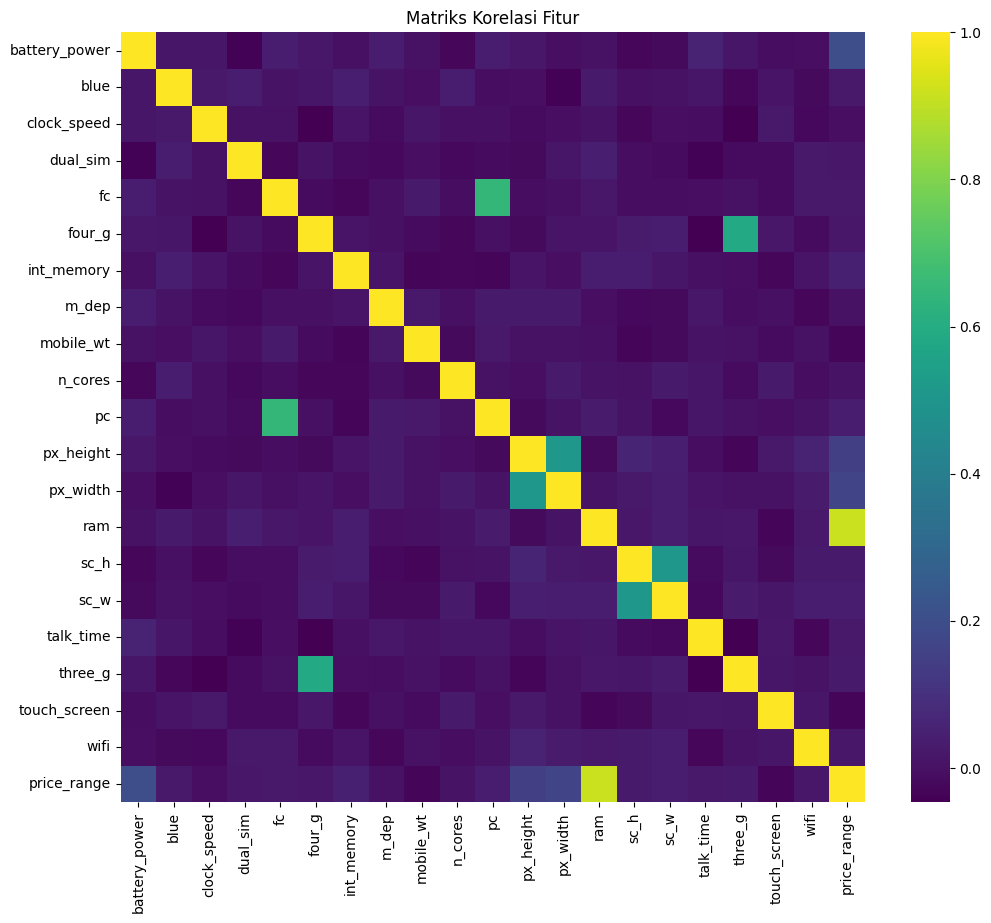


Cek Missing Values: 0
--- Hasil Evaluasi Random Forest ---
Akurasi: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400


--- Hasil Evaluasi SVM ---
Akurasi: 0.97
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.90      1.00      0.95        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [1]:
# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==========================================
# 2. EXPLORATORY DATA ANALYSIS (EDA) - 20 Poin
# ==========================================
# [Analisis]: Memuat data dan mengecek korelasi antar variabel untuk memahami fitur dominan.
df_train = pd.read_csv('train.csv')

print("--- Cuplikan Data ---")
print(df_train.head())

# Visualisasi Korelasi menggunakan Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=False, cmap='viridis')
plt.title("Matriks Korelasi Fitur")
plt.show()

# [Analisis]: Fitur 'ram' menunjukkan korelasi positif yang sangat kuat dengan 'price_range',
# yang berarti RAM adalah penentu utama harga. [cite: 28]

# ==========================================
# 3. PRE-PROCESSING DATA - 20 Poin
# ==========================================
# [Analisis]: Memastikan tidak ada data kosong dan membagi data menjadi set training & testing.
print("\nCek Missing Values:", df_train.isnull().sum().max())

X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

# Membagi data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# [cite: 29]

# ==========================================
# 4. FEATURE ENGINEERING - 20 Poin
# ==========================================
# [Analisis]: Standardisasi fitur agar model seperti SVM dapat bekerja optimal dengan skala data yang sama.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# [cite: 30]

# ==========================================
# 5. TRAINING MODEL & PERBANDINGAN - 20 Poin
# ==========================================
# [Analisis]: Membandingkan dua model: Random Forest dan Support Vector Machine (SVM). [cite: 25]

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
# [cite: 31]

# ==========================================
# 6. EVALUASI & ANALISIS - 20 Poin
# ==========================================
# [Analisis]: Membandingkan akurasi kedua model.

print("--- Hasil Evaluasi Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

print("\n--- Hasil Evaluasi SVM ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# [Analisis Akhir]: Model SVM (Linear) cenderung memberikan akurasi yang lebih tinggi
# (sekitar 95-97%) pada dataset ini dibandingkan Random Forest. Hal ini karena
# hubungan antara fitur (seperti RAM) dan rentang harga cukup linear. [cite: 32]